In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('sales_train_validation.csv')
df['id'] = df['id'].str[:-len('_validation')]
calendar_df = pd.read_csv('calendar.csv')
calendar_df.drop(['weekday', 'wday', 'month', 'year'], inplace = True, axis = 1)
prices_df = pd.read_csv('sell_prices.csv')

In [4]:
df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [3]:
lst = [('d_' + str(i)) for i in range(1, 1914)]
#lst.extend(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])
df_test = pd.read_csv('sales_train_evaluation.csv').drop(lst, axis=1)
df_test['id'] = df_test['id'].str[:-len('_evaluation')]

In [11]:
df_test

,id,item_id,dept_id,cat_id,store_id,state_id,d_1914,d_1915,d_1916,d_1917,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,2,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,1,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,1,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,2,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1,0,2,3,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,0,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,1,1,1,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,0,1,1,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,1,3,0,1,...,1,1,1,4,6,0,1,1,1,0


## EDA

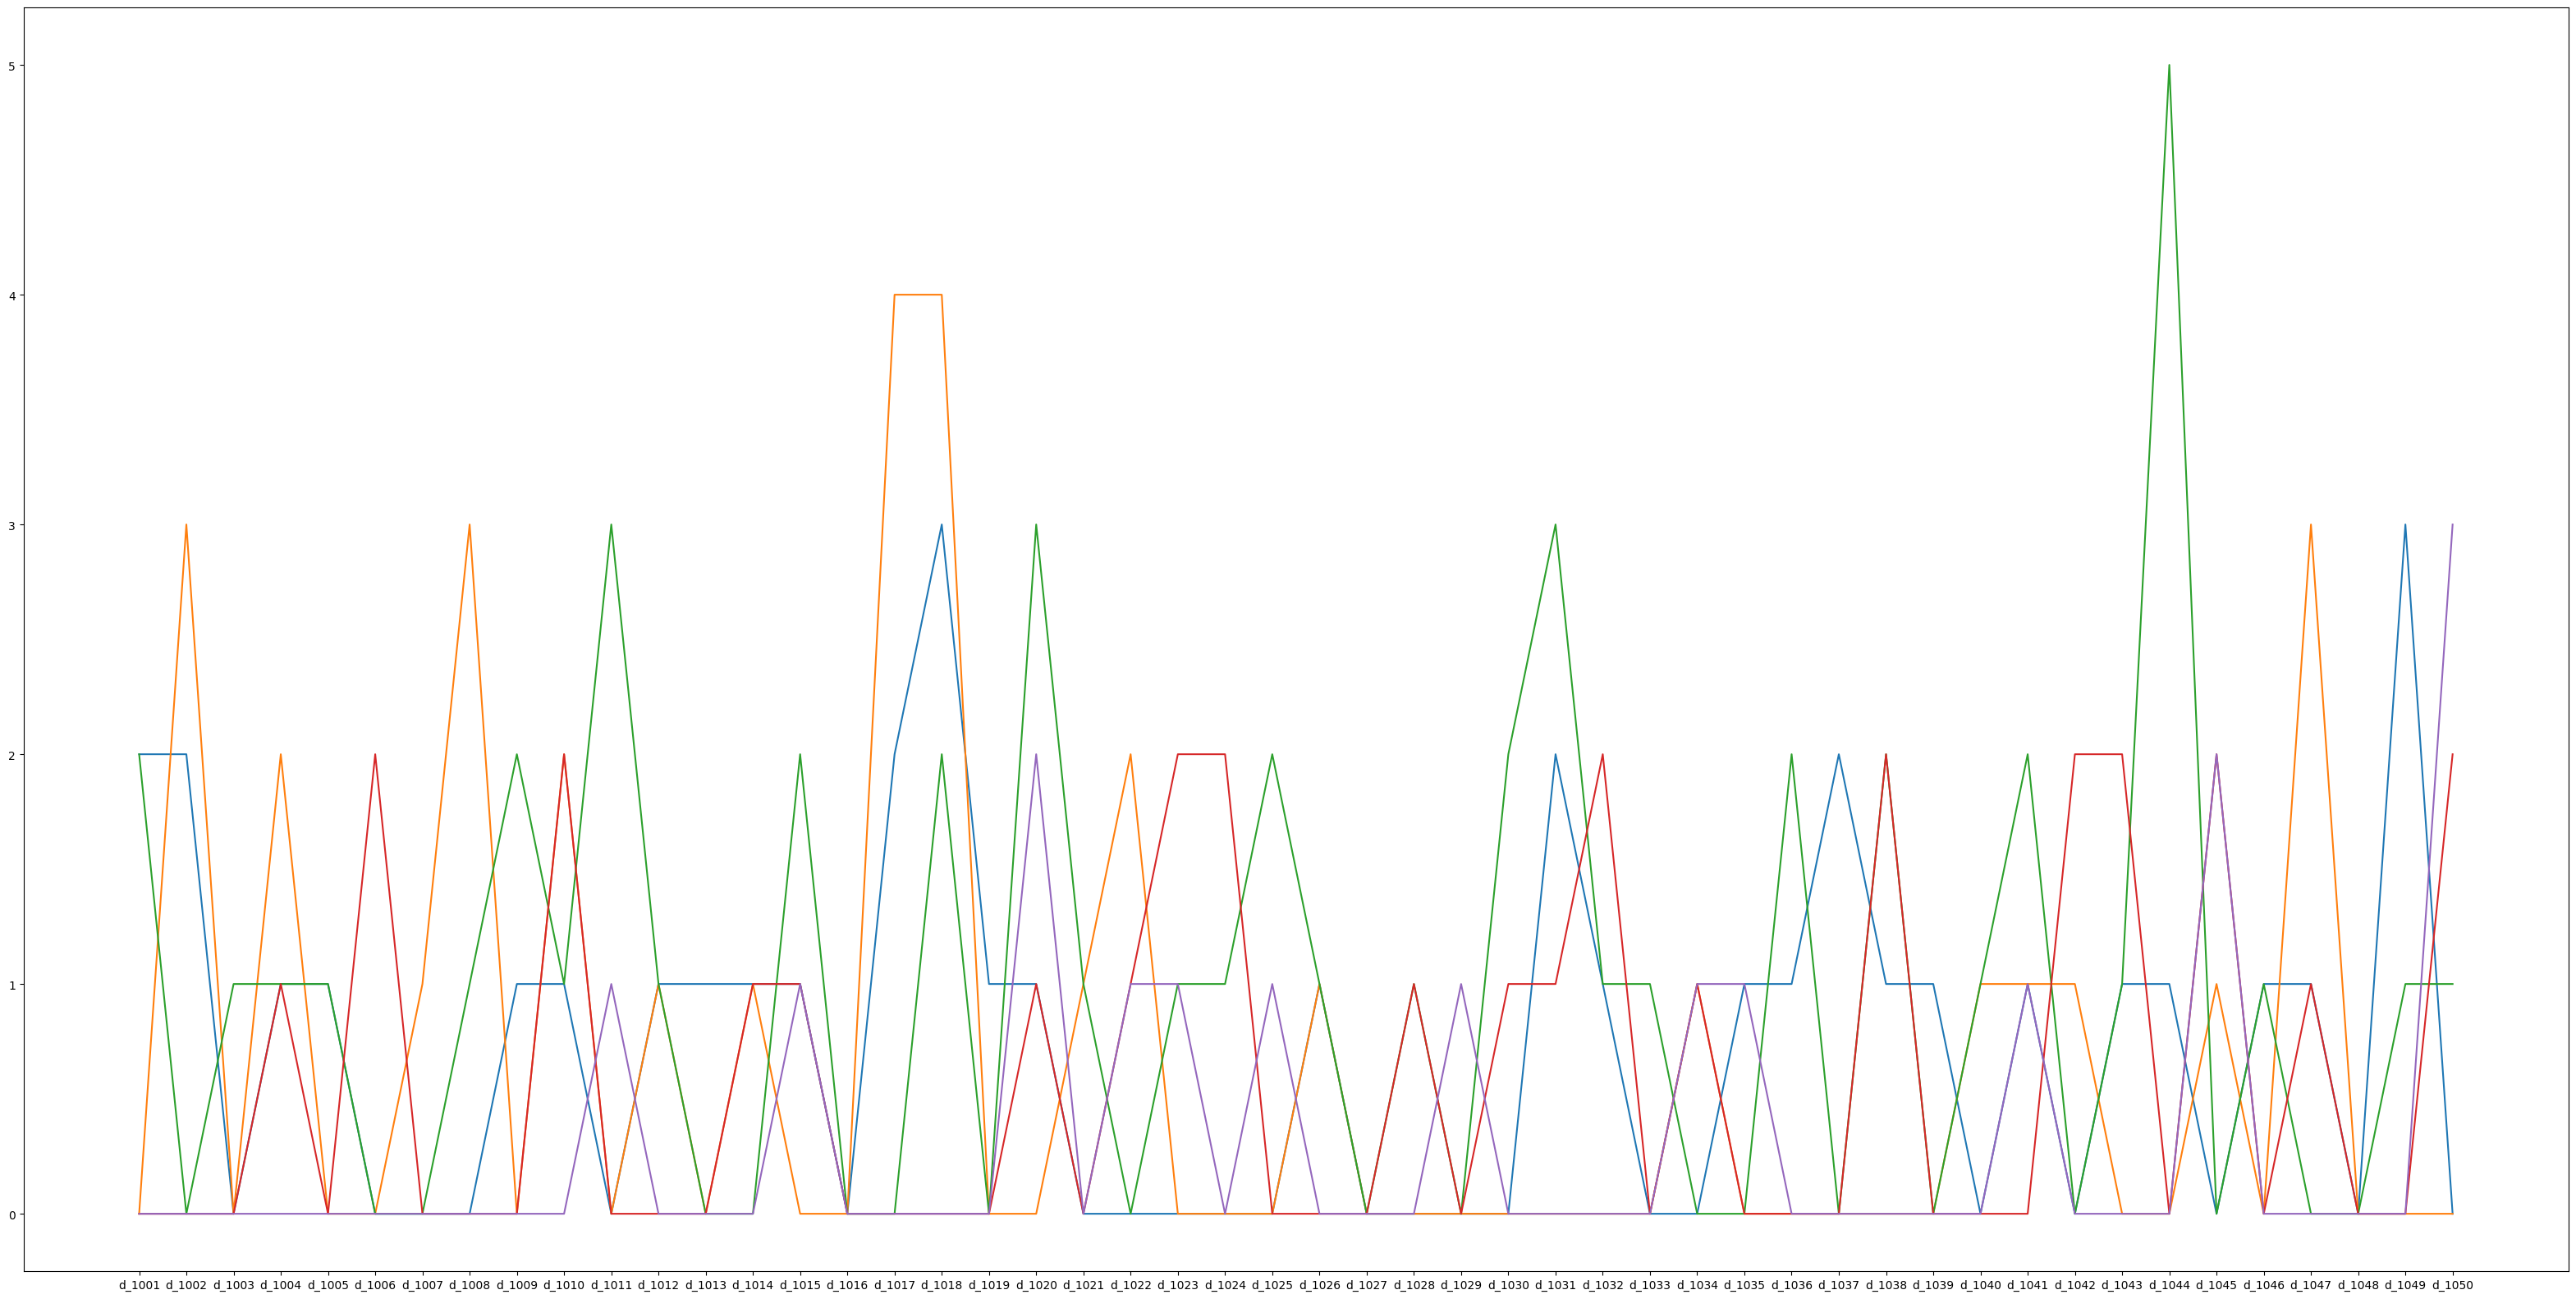

In [32]:
plt.figure(figsize=(40,20))
counter = 0
for index, row in df[df['item_id'] == 'HOBBIES_1_001'].drop(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], axis=1).iterrows():
    if counter > 4: break
    plt.plot(row[1000:1050])
    counter+=1

plt.show()

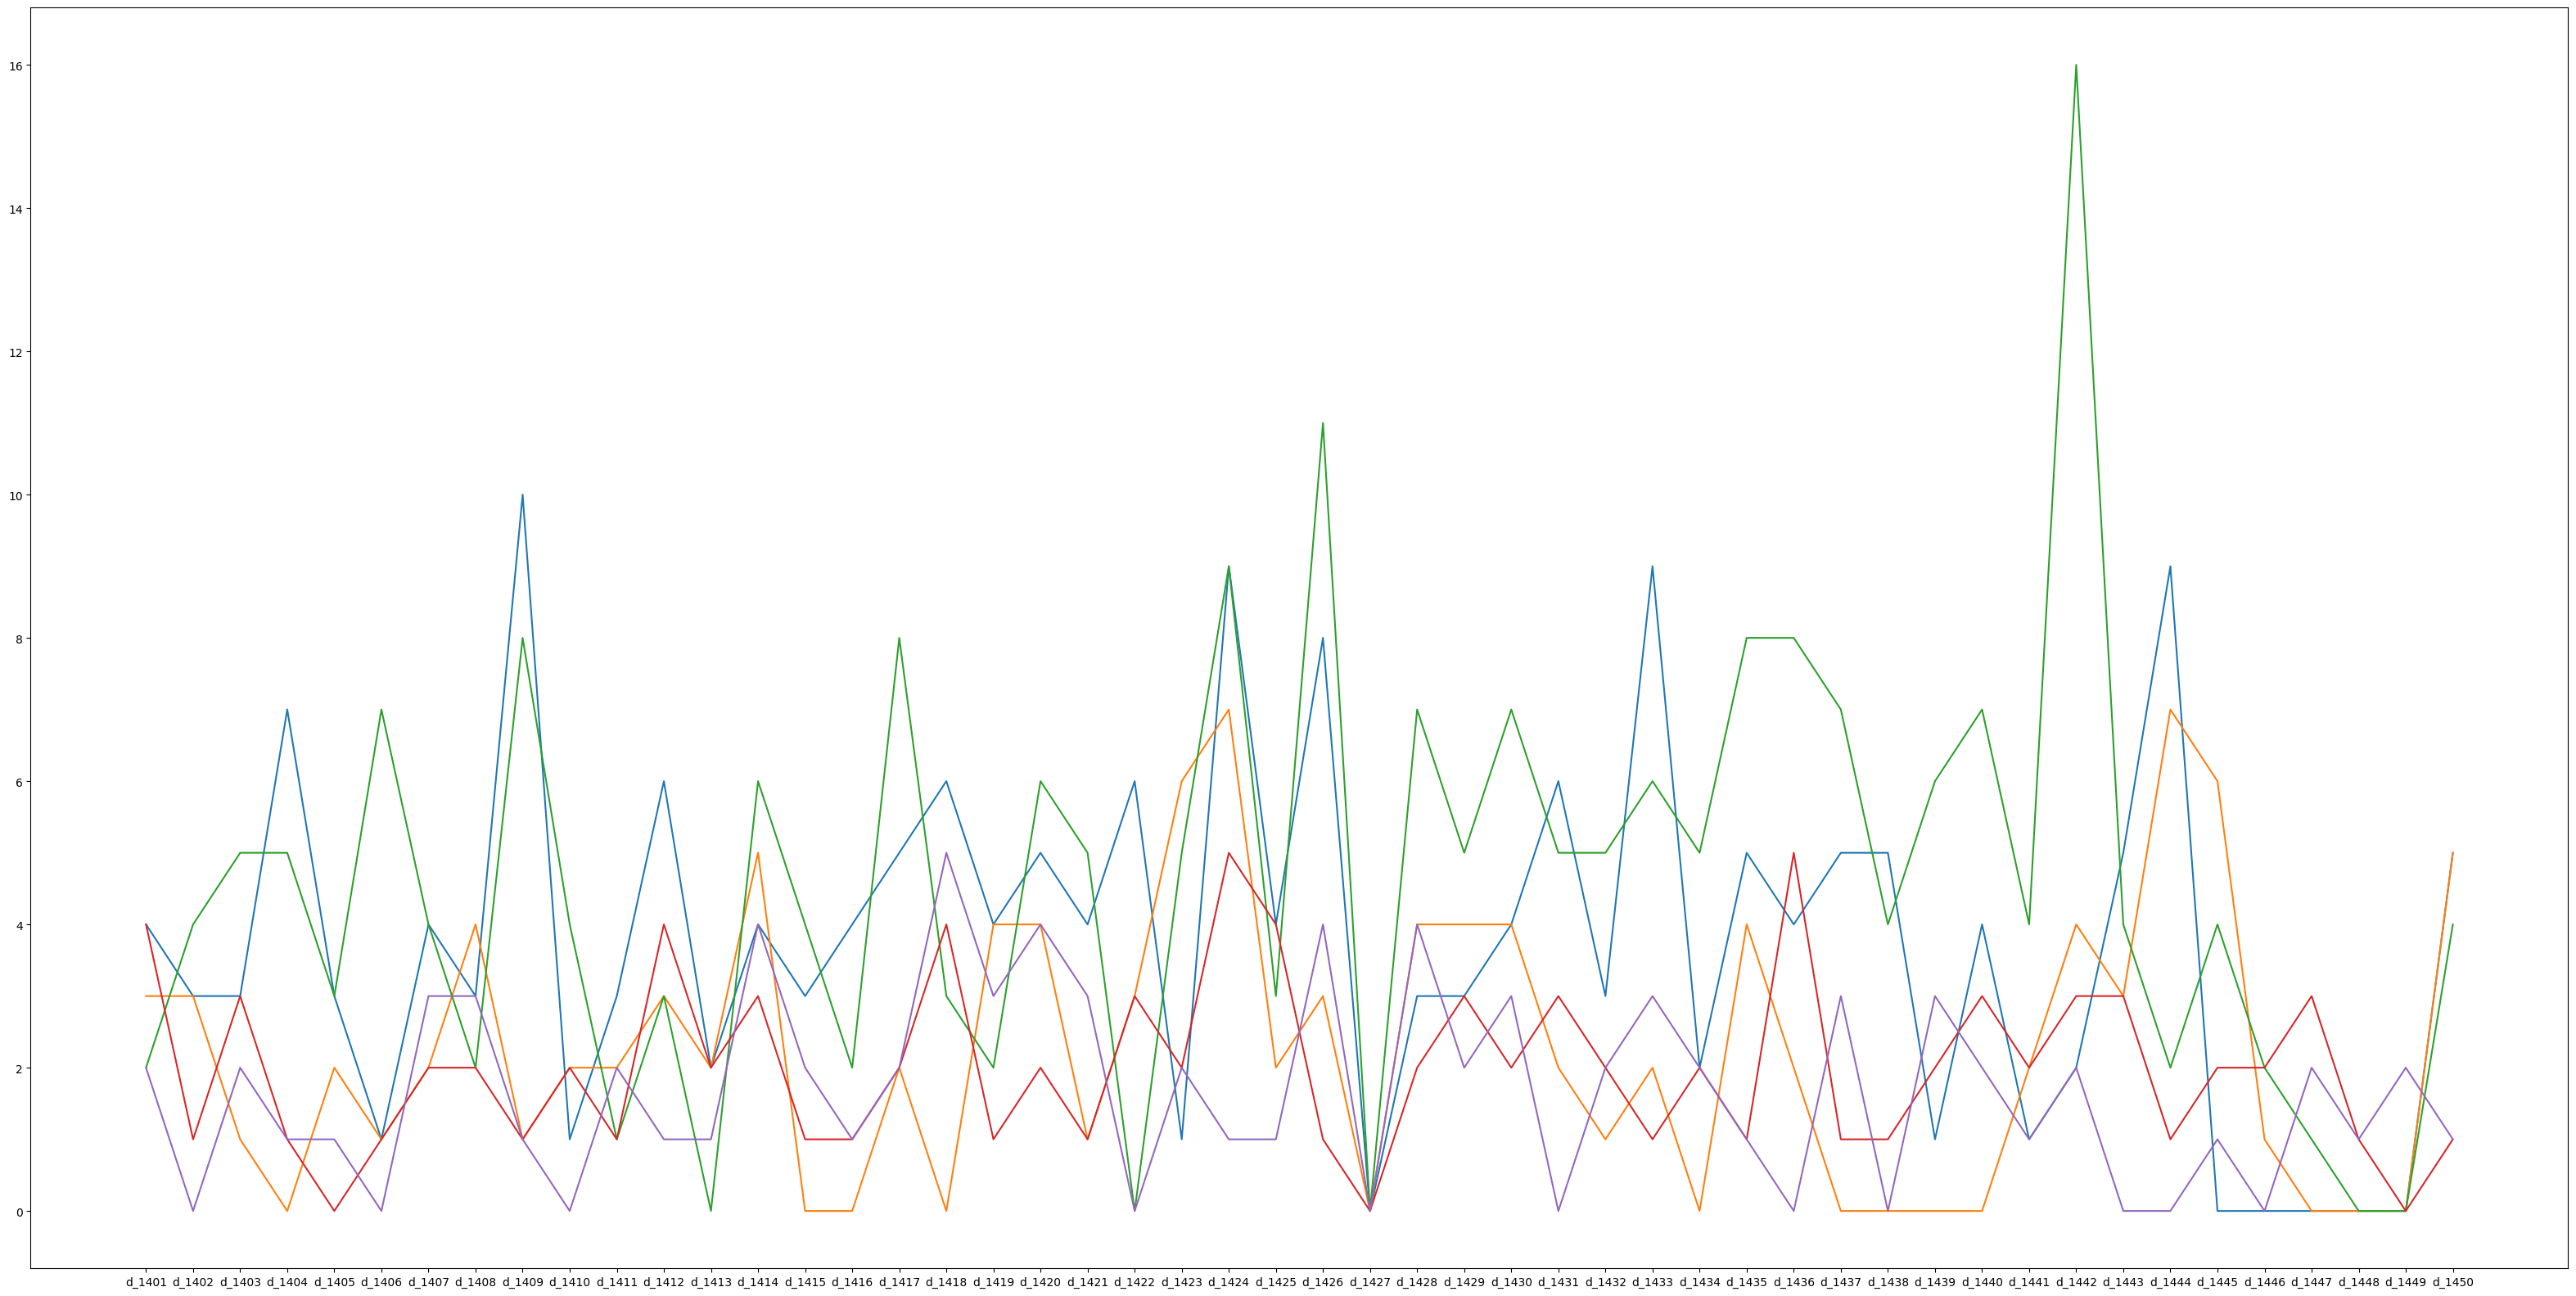

In [41]:
plt.figure(figsize=(40,20))
counter = 0
for index, row in df[df['item_id'] == 'FOODS_3_822'].drop(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], axis=1).iterrows():
    if counter > 4: break
    plt.plot(row[1400:1450])
    counter+=1

plt.show()

I was hoping to see aligned peaks, but instead found other interesting pattern. All items have zeros, probably indicating that days when shop isn't open are included too. Also, for a lot of items there are very few sales and many zeros. 

In [4]:
date_col = [col for col in prices_df if col.startswith('d_')]

df['total_sales'] = df[date_col].sum(axis=1)

In [32]:
hobbies_state = df.loc[(df['cat_id'] == 'HOBBIES')].drop(['item_id', 'dept_id', 'cat_id','store_id'], axis=1).groupby(['state_id']).mean().T
hobbies_state = hobbies_state.rename({'CA': 'HOBBIES_CA', 'TX': 'HOBBIES_TX', 'WI': 'HOBBIES_WI'}, axis=1)
household_state = df.loc[(df['cat_id'] == 'HOUSEHOLD')].drop(['item_id', 'dept_id', 'cat_id','store_id'],axis=1).groupby(['state_id']).mean().T
household_state = household_state.rename({'CA': 'HOUSEHOLD_CA', 'TX': 'HOUSEHOLD_TX', 'WI': 'HOUSEHOLD_WI'}, axis=1)
foods_state = df.loc[(df['cat_id'] == 'FOODS')].drop(['item_id', 'dept_id', 'cat_id','store_id'],axis=1).groupby(['state_id']).mean().T
foods_state = foods_state.rename({'CA': 'FOODS_CA', 'TX': 'FOODS_TX', 'WI': 'FOODS_WI'}, axis=1)
nine_example = pd.concat([hobbies_state, household_state, foods_state], axis=1)
nine_example = nine_example.drop('total_sales')

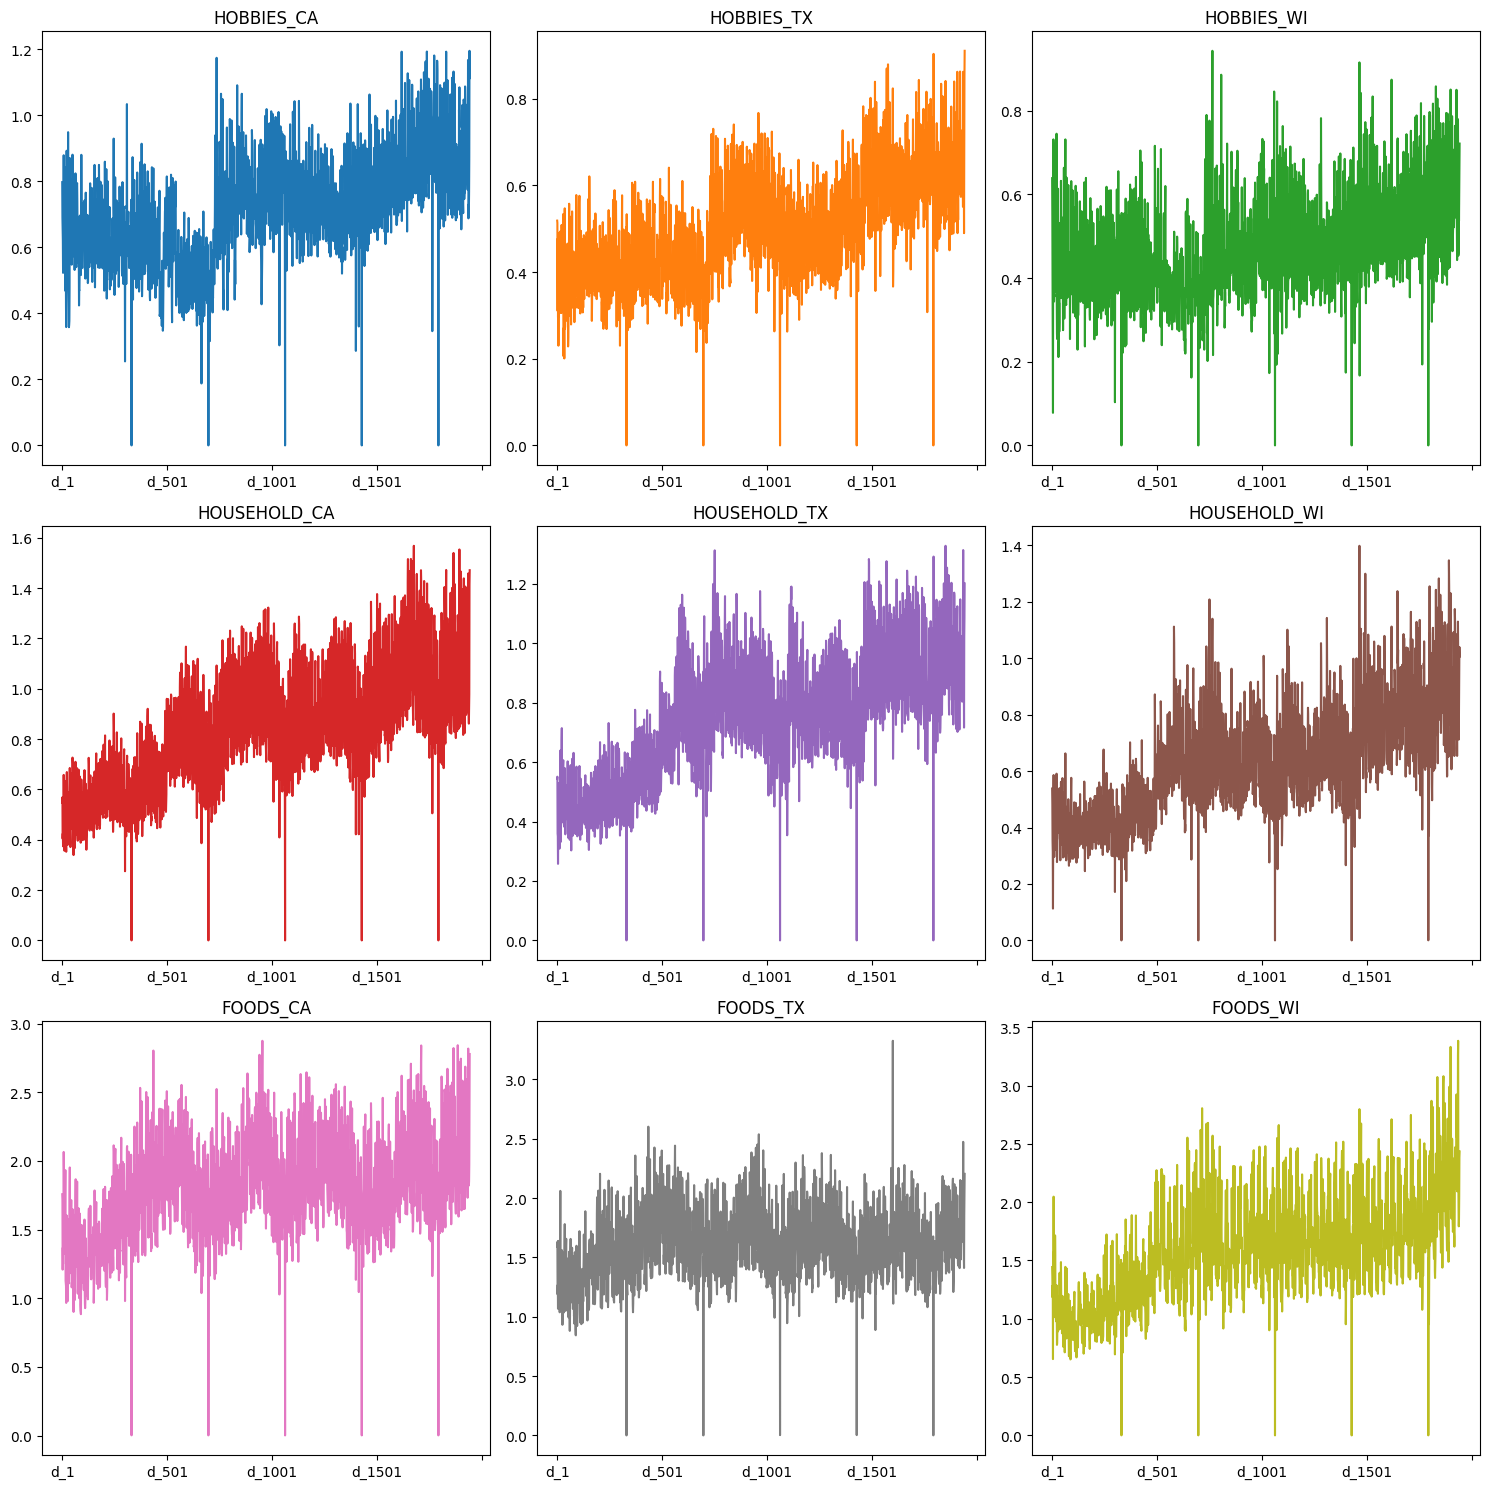

In [33]:
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

fig, axs = plt.subplots(3, 3, figsize=(15,15))
axs = axs.flatten()
ax_idx = 0
for item in nine_example.columns:
    nine_example[item].plot(title=item, color=next(color_cycle), ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

As seen from above plots, tables do include days, when shops don't work, after closer inspection, it turned out that it's once a year occurence - Christmas. Another observation, sales are very low on average for every item. \
Also, sales graphs are: 
1) almost the same for different states
2) very similar for foods and household departments and not that much, but still similar to hobbies \
   \
Which means that it is not necessary to treat each department, state as separate task (though it may affect predictions in a positive way)

## Preproccessing

In [3]:
#import gc

def melt_and_merge(calendar, sell_prices, sales_train_validation):

    # Melt sales data, get it ready for training.
    sales_train_validation = pd.melt(sales_train_validation, id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name = 'day', value_name = 'demand')
    

    data = pd.merge(sales_train_validation, calendar, how = 'left', left_on = ['day'], right_on = ['d'])

    snap = []
    for index, row in data.iterrows():
        snap.append(row['snap_' + row['state_id']])
    data['snap'] = snap
    data.drop(['snap_CA', 'snap_WI', 'snap_TX'], axis=1, inplace=True)
    data.drop(['day'], axis=1, inplace=True)
    
    # Get the sell price data.
    data = data.merge(sell_prices, on = ['store_id', 'item_id', 'wm_yr_wk'], how = 'left')
    data.drop(['wm_yr_wk'], inplace = True, axis = 1)
    print('Final dataset to train has {} rows and {} columns'.format(data.shape[0], data.shape[1]))


    return data
        

train = melt_and_merge(calendar_df, prices_df, df.drop([('d_' + str(i)) for i in range(1, 1914 - 365)], axis=1))
test = melt_and_merge(calendar_df, prices_df, df_test)

evaluation dataset (required for submission on Kaggle)

In [47]:
evaluation_columns = {'id' :  df_test['id'].unique()}#[x + '_evaluation' for x in
evaluation_columns.update(zip(['d_' + str(i) for i in range(1942, 1970)], [0]*len(evaluation_columns['id'])))
evaluation_df = pd.DataFrame(evaluation_columns)

splt_char = "_"
evaluation_df['item_id'] = [splt_char.join(x.split(splt_char)[:3]) for x in evaluation_df['id']]
evaluation_df['dept_id'] = [splt_char.join(x.split(splt_char)[:2]) for x in evaluation_df['id']]
evaluation_df['cat_id'] = [splt_char.join(x.split(splt_char)[:1]) for x in evaluation_df['id']]
evaluation_df['state_id'] = [splt_char.join(x.split(splt_char)[-2:-1]) for x in evaluation_df['id']]
evaluation_df['store_id'] = [splt_char.join(x.split(splt_char)[-2:]) for x in evaluation_df['id']]

In [5]:
evaluation_df

,id,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,...,d_1965,d_1966,d_1967,d_1968,d_1969,item_id,dept_id,cat_id,state_id,store_id
0,HOBBIES_1_001_CA_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,CA_1
1,HOBBIES_1_002_CA_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA,CA_1
2,HOBBIES_1_003_CA_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA,CA_1
3,HOBBIES_1_004_CA_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA,CA_1
4,HOBBIES_1_005_CA_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA,CA_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,FOODS_3_823,FOODS_3,FOODS,WI,WI_3
30486,FOODS_3_824_WI_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,FOODS_3_824,FOODS_3,FOODS,WI,WI_3
30487,FOODS_3_825_WI_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,FOODS_3_825,FOODS_3,FOODS,WI,WI_3
30488,FOODS_3_826_WI_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,FOODS_3_826,FOODS_3,FOODS,WI,WI_3


In [ ]:
test.to_csv('test_merged.csv', index=False)

In [49]:
train = pd.read_csv('train_merged1.csv')
test = pd.read_csv('test_merged1.csv')

/tmp/ipykernel_4111/2055458218.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train_merged1.csv')
/tmp/ipykernel_4111/2055458218.py:2: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('test_merged1.csv')


In [50]:
train = train[train['sell_price'].notna()]
train['date'] = [x[5:] for x in train['date']]
train[['event_type_1', 'event_name_1', 'event_name_2', 'event_type_2']] = train[['event_type_1', 'event_name_1', 'event_name_2', 'event_type_2']].fillna('none')

#not completely sure about dropping state_id and cat_id, but they are probably heavily correlated to store_id and dept_id, especially considering low amount of categories
train.drop(['state_id', 'cat_id'], axis=1, inplace=True)

In [51]:
test['date'] = [x[5:] for x in test['date']]
test[['event_type_1', 'event_name_1', 'event_name_2', 'event_type_2']] = test[['event_type_1', 'event_name_1', 'event_name_2', 'event_type_2']].fillna('none')

test.drop(['state_id', 'cat_id'], axis=1, inplace=True)

In [48]:
eval = melt_and_merge(calendar_df, prices_df, evaluation_df)
eval['date'] = [x[5:] for x in eval['date']]
eval[['event_type_1', 'event_name_1', 'event_name_2', 'event_type_2']] = eval[['event_type_1', 'event_name_1', 'event_name_2', 'event_type_2']].fillna('none')

eval.drop(['state_id', 'cat_id'], axis=1, inplace=True)

Final dataset to train has 853720 rows and 15 columns


In [52]:
from sklearn.preprocessing import OrdinalEncoder
label_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, dtype=np.int64)
categorical = ['item_id', 'dept_id', 'store_id', 'date' ,'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap']

train[categorical] = label_encoder.fit_transform(train[categorical])
test[categorical] = label_encoder.transform(test[categorical])
eval[categorical] = label_encoder.transform(eval[categorical])
    


train_X, train_Y = train.drop(['id', 'demand', 'd'], axis=1), train['demand']
test_X, test_Y = test.drop(['id', 'demand', 'd'], axis=1), test['demand']
eval_X = eval.drop(['id', 'd', 'demand'], axis=1)

In [ ]:
eval.to_csv('eval_merged.csv', index=False)

## Baseline (historical mean for each id)

In [18]:
baseline = dict(zip(df['id'].to_list() , df.drop(categorical, axis=1).mean(axis=1)))

test_baseline_X, target_baseline = test['id'], test['demand']

In [27]:
predictions_baseline = []
for el in test_baseline_X:
    predictions_baseline.append(baseline[el])

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

baseline_mse = mean_squared_error(predictions_baseline, test_Y)

print('RMSE error: ' + str(sqrt(baseline_mse)))

RMSE error: 2.5632565667699074


## Gradient Boosting
Works well with table data, probably better than anything except for deep networks

In [13]:
from catboost import CatBoostRegressor

CB_model = CatBoostRegressor(loss_function='RMSE', cat_features=categorical)
CB_model.fit(train_X[:500000], train_Y[:500000]) #taking first n elements is very wrong here, because initial plan was to train on each day of year for every item, but now some days of year are ignored.
                                                 #Unfortunately, my computer cant handle 11*10^6 training elements, so I'll leave it like this. I think it's the reason why baseline error is less than GB error

Learning rate set to 0.109299
0:	learn: 3.4537855	total: 121ms	remaining: 2m
1:	learn: 3.3572220	total: 153ms	remaining: 1m 16s
2:	learn: 3.2795495	total: 215ms	remaining: 1m 11s
3:	learn: 3.2141970	total: 259ms	remaining: 1m 4s
4:	learn: 3.1585208	total: 310ms	remaining: 1m 1s
5:	learn: 3.1130260	total: 383ms	remaining: 1m 3s
6:	learn: 3.0665165	total: 486ms	remaining: 1m 8s
7:	learn: 3.0325481	total: 548ms	remaining: 1m 7s
8:	learn: 2.9989386	total: 626ms	remaining: 1m 8s
9:	learn: 2.9641129	total: 669ms	remaining: 1m 6s
10:	learn: 2.9367751	total: 763ms	remaining: 1m 8s
11:	learn: 2.9090461	total: 833ms	remaining: 1m 8s
12:	learn: 2.8900380	total: 883ms	remaining: 1m 7s
13:	learn: 2.8729836	total: 932ms	remaining: 1m 5s
14:	learn: 2.8526947	total: 1.01s	remaining: 1m 6s
15:	learn: 2.8337133	total: 1.09s	remaining: 1m 7s
16:	learn: 2.8211991	total: 1.17s	remaining: 1m 7s
17:	learn: 2.8033039	total: 1.26s	remaining: 1m 8s
18:	learn: 2.7950260	total: 1.32s	remaining: 1m 8s
19:	learn: 2

In [27]:
predictions = [round(x) if x >= 0 else 0 for x in CB_model.predict(test_X)]
#predictions =  CB_model.predict(test_X)

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
forecast_mse = mean_squared_error(predictions, test_Y)

print('RMSE error: ' + str(sqrt(forecast_mse)))

RMSE error: 2.878199478040627


# Get predictions ready for submisssion

In [ ]:
#get the initial, not encoded version
test = pd.read_csv('test_merged1.csv')

/tmp/ipykernel_4111/193918314.py:2: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('test_merged1.csv')


In [59]:
submission_valid = {'id' :  [x + '_validation' for x in df_test['id'].unique()]}
submission_valid.update(zip(['F' + str(i) for i in range(1, 29)], [0]*len(submission_valid['id'])))
df_valid = pd.DataFrame(submission_valid)
df_valid.set_index('id', inplace=True)

for i in range(len(predictions)):
    df_valid.loc[test.iloc[i]['id'] + '_validation']['F' + str(int(test.iloc[i]['d'][2:]) - 1914)] = predictions[i]

In [60]:
df_valid.to_csv('submission.csv')

In [61]:
predictions_eval = [round(x) if x >= 0 else 0 for x in CB_model.predict(eval_X)]

In [62]:
submission_eval = {'id' :  [x + '_evaluation' for x in df_test['id'].unique()]}#
submission_eval.update(zip(['F' + str(i) for i in range(1, 29)], [0]*len(submission_eval['id'])))
df_eval = pd.DataFrame(submission_eval)
df_eval.set_index('id', inplace=True)

for i in range(len(predictions_eval)):
    df_eval.loc[test.iloc[i]['id'] + '_evaluation']['F' + str(int(test.iloc[i]['d'][2:]) - 1914)] = predictions_eval[i]

In [63]:
df_eval.to_csv('submission.csv', mode='a')